In [1]:
!pip install kaggle --upgrade

In [2]:
!mkdir ~/.kaggle/

In [3]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 89% 77.0M/86.8M [00:00<00:00, 123MB/s]
100% 86.8M/86.8M [00:00<00:00, 127MB/s]


In [14]:
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [15]:
!unzip brain-tumor-classification-mri.zip -d dataset

Archive:  brain-tumor-classification-mri.zip
  inflating: dataset/Testing/glioma_tumor/image(1).jpg  
  inflating: dataset/Testing/glioma_tumor/image(10).jpg  
  inflating: dataset/Testing/glioma_tumor/image(100).jpg  
  inflating: dataset/Testing/glioma_tumor/image(11).jpg  
  inflating: dataset/Testing/glioma_tumor/image(12).jpg  
  inflating: dataset/Testing/glioma_tumor/image(13).jpg  
  inflating: dataset/Testing/glioma_tumor/image(14).jpg  
  inflating: dataset/Testing/glioma_tumor/image(15).jpg  
  inflating: dataset/Testing/glioma_tumor/image(16).jpg  
  inflating: dataset/Testing/glioma_tumor/image(17).jpg  
  inflating: dataset/Testing/glioma_tumor/image(18).jpg  
  inflating: dataset/Testing/glioma_tumor/image(19).jpg  
  inflating: dataset/Testing/glioma_tumor/image(2).jpg  
  inflating: dataset/Testing/glioma_tumor/image(20).jpg  
  inflating: dataset/Testing/glioma_tumor/image(21).jpg  
  inflating: dataset/Testing/glioma_tumor/image(22).jpg  
  inflating: dataset/Testing

In [16]:
! ls dataset/

Testing  Training


In [17]:
! ls dataset/Testing

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [18]:
! ls dataset/Testing/no_tumor

'image(100).jpg'  'image(30).jpg'  'image(55).jpg'  'image(7).jpg'
'image(101).jpg'  'image(31).jpg'  'image(56).jpg'  'image(80).jpg'
'image(102).jpg'  'image(32).jpg'  'image(57).jpg'  'image(81).jpg'
'image(103).jpg'  'image(33).jpg'  'image(58).jpg'  'image(82).jpg'
'image(104).jpg'  'image(34).jpg'  'image(59).jpg'  'image(83).jpg'
'image(10).jpg'   'image(35).jpg'  'image(5).jpg'   'image(84).jpg'
'image(11).jpg'   'image(36).jpg'  'image(60).jpg'  'image(85).jpg'
'image(12).jpg'   'image(37).jpg'  'image(61).jpg'  'image(86).jpg'
'image(13).jpg'   'image(38).jpg'  'image(62).jpg'  'image(87).jpg'
'image(14).jpg'   'image(39).jpg'  'image(63).jpg'  'image(88).jpg'
'image(15).jpg'   'image(3).jpg'   'image(64).jpg'  'image(89).jpg'
'image(16).jpg'   'image(40).jpg'  'image(65).jpg'  'image(8).jpg'
'image(17).jpg'   'image(41).jpg'  'image(66).jpg'  'image(90).jpg'
'image(18).jpg'   'image(42).jpg'  'image(67).jpg'  'image(91).jpg'
'image(19).jpg'   'image(43).jpg'  'image(68).jpg'

In [19]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2 as cv
import os
import PIL

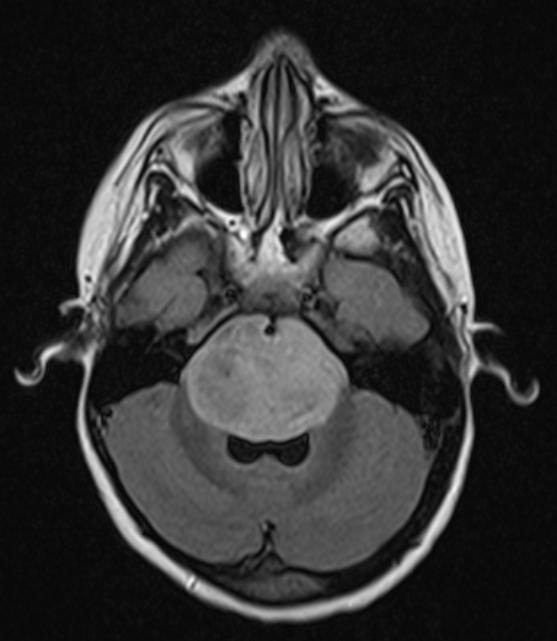

In [20]:
# how an image looks
I = np.asarray(PIL.Image.open("dataset/Testing/glioma_tumor/image(2).jpg"))
im = PIL.Image.fromarray(np.uint8(I))
im

In [22]:
image_size = (150, 150)
img_height = 150
img_width = 150
batch_size = 32

In [23]:
# create the datasets using Keras DataSet object
import tensorflow as tf 
from tensorflow import keras

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training/",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Testing/",
    image_size=image_size,
    batch_size=batch_size,
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [24]:
im_classes = {
  0 : 'Glioma',
  1 : 'Meningioma',
  2 : 'No Tumor',
  3 : 'Pituitary',
}
class_labels = list(im_classes.values())
num_classes = len(class_labels)

In [25]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [26]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam', # adam is best optimizer (highest accuracy)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [29]:
epochs=10

history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/10
90/90 [==============================] - 36s 75ms/step - loss: 0.8766 - accuracy: 0.6408 - val_loss: 1.5082 - val_accuracy: 0.4137
Epoch 2/10
90/90 [==============================] - 7s 71ms/step - loss: 0.5110 - accuracy: 0.8052 - val_loss: 1.9290 - val_accuracy: 0.4975
Epoch 3/10
90/90 [==============================] - 6s 67ms/step - loss: 0.3020 - accuracy: 0.8895 - val_loss: 3.1031 - val_accuracy: 0.5635
Epoch 4/10
90/90 [==============================] - 6s 66ms/step - loss: 0.1949 - accuracy: 0.9359 - val_loss: 3.4791 - val_accuracy: 0.7081
Epoch 5/10
90/90 [==============================] - 6s 66ms/step - loss: 0.1353 - accuracy: 0.9512 - val_loss: 3.4574 - val_accuracy: 0.7538
Epoch 6/10
90/90 [==============================] - 7s 68ms/step - loss: 0.0640 - accuracy: 0.9794 - val_loss: 4.0060 - val_accuracy: 0.7741
Epoch 7/10
90/90 [==============================] - 6s 68ms/step - loss: 0.0323 - accuracy: 0.9902 - val_loss: 5.2886 - val_accuracy: 0.7081
Epoch 8/10
9